In [1]:
import numpy as np
import matplotlib
# interaktywne wykresy:
%matplotlib notebook
from matplotlib import pyplot as plt

# https://docs.python.org/2/library/collections.html#collections.Counter
from collections import Counter

## Rozkład dyskretny

Rozkład dyskretny zdefiniowany jest na skończonej lub przeliczalnej liczbie punktów.

Każdy punkt ma określone prawdopodobieństwo. Jest to nieujemna liczba rzeczywista.

Wszystkie prawdopodobieństwa muszą sumować się do jedności.

Im większe prawdopodobieństwo punktu, tym częściej się on wylosuje. Im więcej punktów wylosujemy, tym bardziej liczba wylosowań danego punktu podzielona przez liczbę wszystkich losowań przybliża prawdopodobieństwo tego punktu.

Punkty o prawdopodobieństwie równym zero nie wylosują się nigdy.

<IPython.core.display.Javascript object>


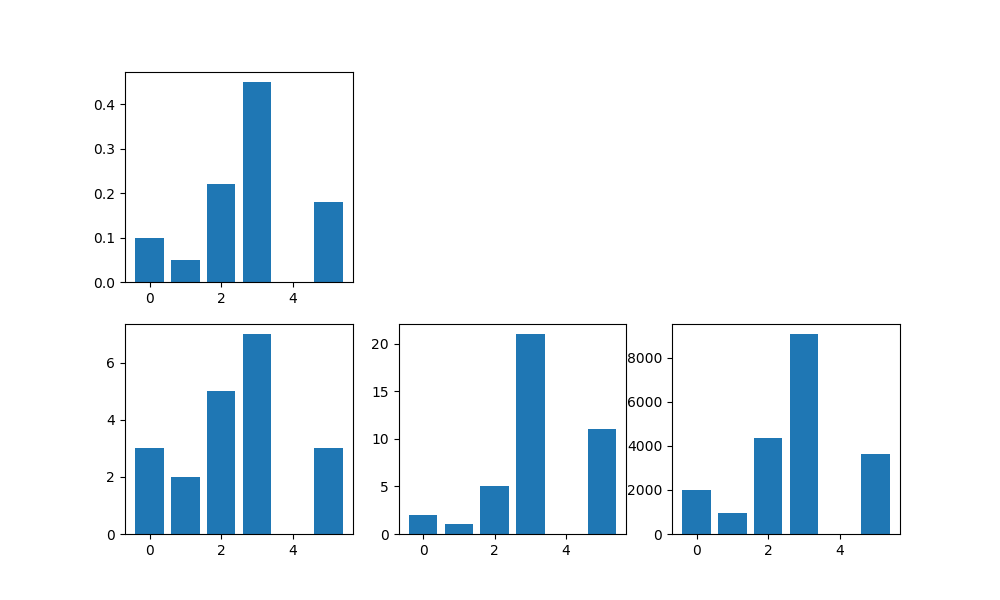

In [2]:
rng = np.random.RandomState(seed=43)

p = [.1, .05, .22, .45, 0., .18]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(2, 3, 1)
ax.bar(list(range(len(p))), p)

def draw(n_samples, which_subplot):
    # losujemy n_samples sampli
    samples = np.array([rng.choice(range(len(p)), p=p) for _ in range(n_samples)])
    # zliczamy sample - Counter(samples) jest słownikiem, klucze to sample, wartości to liczba wystąpień
    c_samples = [Counter(samples)[i] for i in range(len(p))]
    ax = fig.add_subplot(2, 3, which_subplot)
    # na osi poziomej zaznaczamy sample (czyli kolejne liczby naturalne), na pionowej liczbę wystąpień
    ax.bar(list(range(len(p))), c_samples)

draw(n_samples=20, which_subplot=4)
draw(n_samples=40, which_subplot=5)
draw(n_samples=20000, which_subplot=6)

## Rozkład ciągły

Rozkład ciągły zdefiniowany jest na przestrzeni $\mathbb{R}^n$ (całej lub jej fragmencie).

Zamiast prawdopodobieństwa mamy zdefiniowaną funkcję gęstości. Gęstość jest nieujemna.

Gęstość musi całkować się do jedności.

Im większa gęstość w okolicy danego punktu, tym częściej w okolicy tego punktu wylosują się sample.

W dwa razy szerszym przedziale, który ma dwa razy mniejszą gęstość, wylosuje się mniej więcej tyle samo punktów, co w przedziale oryginalnym.

Każdy punkt ma prawdopodobieństwo zero. Nie ma sensu mówić o prawdopodobieństwie punktu w kontekście samplowania. 

Nawet przy nieskończenie wielu losowaniach żaden punkt nie wylosuje się dwa razy.

Jeśli wybierzemy sobie jakiś punkt, to on nie wylosuje się nigdy (ale trzeba wybrać przed rozpoczęciem losowania).

W przedziałach o prawdopodobieństwie zero punkty nie wylosują się nigdy.

### Rozkład normalny (Gaussa)

https://en.wikipedia.org/wiki/Normal_distribution

Co trzeba umieć i rozumieć:
* wzór na gęstość
* powiązanie gęstości z kształtem
* co robią parametry mean i variance (loc i scale)

https://en.wikipedia.org/wiki/Multivariate_normal_distribution

Co trzeba umieć i rozumieć:
* kształt (elipsoidalna górka)
* rozkłady brzegowe to rozkłady normalne

https://en.wikipedia.org/wiki/Mixture_distribution

Co trzeba umieć i rozumieć:
* jak wygląda gęstość mixture distribution
* jak wygląda samplowanie

### Rozkład jednostajny

Co trzeba umieć i rozumieć:
* to samo, co dla rozkładu normalnego

<IPython.core.display.Javascript object>


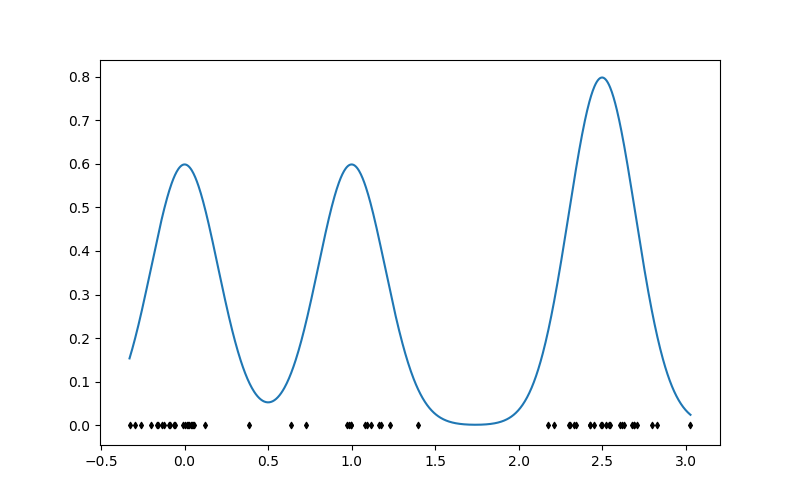

In [3]:
# Proszę zajrzeć do lab2 i poczytać, co to robi
from lab2 import MixtureGaussian

n_samples = 60

# MIKSTURA JEDNEGO ROZKŁADU GAUSSA TO (NIESPODZIANKA!) ROZKŁAD GAUSSA
MG0 = MixtureGaussian(
    locs=[2.5],
    scales=[.5],
    p=[1.])

# MIKSTURA TRZECH GAUSSÓW
MG1 = MixtureGaussian(
    locs=[0., 1., 2.5],
    scales=[.2, .2, .2],
    p=[.3, .3, .4])

# GĘSTOŚĆ MOŻE BYĆ WIĘKSZA OD 1
MG2 = MixtureGaussian(
    locs=[0., 1., 2.5],
    scales=[.2, .7, .5],
    p=[.6, .3, .1])

# GĘSTOŚĆ MOŻE BYĆ DOWOLNIE DUŻA
MG3 = MixtureGaussian(
    locs=[0., 1., 2.5],
    scales=[.002, .7, .5],
    p=[.6, .3, .1])

# TU MOŻEMY WYPRÓBOWAĆ WSZYSTKIE CZTERY POWYŻSZE ROZKŁADY
#mg = MG0
mg = MG1
#mg = MG2
#mg = MG3

samples = np.array([mg.sample() for _ in range(n_samples)])

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# narysujmy gęstość rozkładu
x_pdf = np.linspace(min(samples), max(samples), num=1000)
y_pdf = np.vectorize(mg.pdf)(x_pdf)
ax.plot(x_pdf, y_pdf)

# zaznaczmy na osi poziomej wylosowane punkty
ax.scatter(samples, 0*samples, c='k', s=10, marker='d')

## Rozkład mieszany

W praktyce bardzo często będziemy używali kombinacji rozkładów ciągłych i dyskretnych. Zasada jest następująca:

1. Musimy mieć dobrze zdefiniowaną przestrzeń, z której losujemy. W powyższych przykładach tą przestrzenią był albo zbiór punktów (rozkład dyskretny), albo $\mathbb{R}^n$ (rozkład ciągły). Teraz możemy mieć dowolnie wiele punktów oraz fragmentów przestrzeni $\mathbb{R}^n$ dla różnych $n$.

2. Każdy fragment ma oddzielnie zdefiniowaną gęstość. Punkty mają zdefiniowane prawdopodobieństwa liczbowe.

3. Na fragmentach $\mathbb{R}^n$ liczymy $n$-wymiarową całkę - dla różnych $n$ są to różne całki. Na punktach sumujemy prawdopodobieństwa.

4. Gęstości __łącznie__ całkują się do jedności - to znaczy, że jeśli policzymy całkę na każdym fragmencie, a następnie zsumujemy te całki z prawdopodobieństwami punktów, to otrzymamy $1$.

5. Wartość liczbowa całki po danym fragmencie mówi, jak często losowy punkt pochodzi właśnie z tego fragmentu. W ramach fragmentu obowiązują zasady samplowania jak dla rozkładów ciągłych i dyskretnych.

#### < Tu się kończy mój skill w rysowaniu wykresów pyplotem >

#### Przykład 1.

Rozkład mieszany na $\mathbb{R} \cup \mathbb{R}^2$. Na wykresach narysowana jest gęstość rozkładu, oddzielnie dla dwóch fragmentów. 40% sampli będzie pochodziło z $\mathbb{R}$ (niebieski), a 60% z $\mathbb{R}^2$ (czerwony). Proszę zauważyć, że po lewej liczymy całkę jednowymiarową, a po prawej dwuwymiarową.

![proba1](lab2/proba1.png)

Sample mogą wyglądać np. tak:
* pierwszy: $0.6$
* drugi: $(1.8, 0.8)$
* trzeci: $0.4$
* czwarty: $(1.4, 1.2)$
* piąty: $(2.2, 1.1)$
* itd.

#### Przykład 2.

Może się zdarzyć, że wszystkie punkty leżą np. w przestrzeni $\mathbb{R}^2$, ale tak naprawdę ta przestrzeń podzielona jest na kilka kawałków.

Na poniższym rysunku mamy cztery fragmenty:
* czarny - 25% całego rozkładu, całka dwuwymiarowa na $(0, +\infty)^2$,
* niebieski - 25% całego rozkładu, całka jednowymiarowa na $(0, +\infty) \times \{0\}$, gdzie przy całkowaniu "zapominamy" o drugiej współrzędnej,
* czerwony - 25% całego rozkładu, całka jednowymiarowa na $\{0\} \times (0, +\infty)$, gdzie przy całkowaniu "zapominamy" o pierwszej współrzędnej,
* zielony - pojedynczy punkt, którego prawdopodobieństwo wynosi 25%.

(dygresja - tak zachowują się sieci neuronowe z funkcją aktywacji ReLU!)

![proba2](lab2/proba2.png)

Możemy łatwo napisać samplowanie, które odpowiada sytuacji na rysunku:

In [4]:
# https://github.com/jupyter/notebook/issues/2284
from IPython.display import HTML as html_print
def cstr(s, color):
    # nowe formatowanie
    return "<text style=color:{}>{}</text>".format(color, s)

rng = np.random.RandomState(seed=43)
def sample():
    THRESHOLD1 = 0. # CO SIĘ STANIE, GDY ZMIENIMY THRESHOLD? JAK ZMIENI SIĘ RYSUNEK I WYNIK SAMPLOWANIA?
    THRESHOLD2 = 0.
    return max(THRESHOLD1, rng.normal()), max(THRESHOLD2, rng.normal())

for _ in range(32):
    # stare formatowanie
    x1, x2 = sample()
    # w którym miejscu na wykresie jesteśmy:
    if x1 == 0. and x2 == 0:
        color = "green"
    elif x1 > 0. and x2 > 0.:
        color = "black"
    elif x1 > 0.: # and x2 == 0
        color = "blue"
    else: # x1 == 0 and x2 > 0
        color = "red"
    s = "(x1, x2): (%.3f, %.3f)" % (x1, x2)
    display(html_print(cstr(s, color)))